**EXPLORATORY DATA ANALYSIS**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm
from scipy import stats
from sklearn.impute import SimpleImputer

READ BIGMART CSV DATASET

In [2]:
a = pd.read_csv('bigmart.csv')

In [13]:
a.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1, inplace = True)

the numerical and categorical feature names in a variable are stored for future use.

In [14]:
categorical = ['Item_Fat_Content', 'Outlet_Size','Outlet_Location_Type','Outlet_Type', 'Item_Type']
continuous = ['Item_Weight','Item_Visibility', 'Item_MRP','Item_Outlet_Sales']


**STRUCTURE OF THE BIGMART DATASET**



In [3]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB



There are 9 features except item_identifier and outlet_identifier, among which 5 are categorical and 4 are continuous.
Target variable is Item_Outlet_Sales and it is a continuous variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


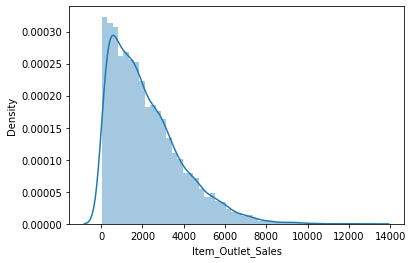

In [15]:
sns.distplot(a['Item_Outlet_Sales'])
plt.show()

Item_Outlet_sales is skewed positively.

In [16]:
a.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
a.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_weight and Outlet_size are having the missing values.

Checking for 0 values.

In [18]:
a.eq(0).sum()

Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

There is 0 value only in Item_Visibilty feature. We can treat it as normal value or missing value. 
here we take it as missing value,so it can be solved by assuming it as missing completely at random.  

In [19]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values  = np.nan, strategy = 'mean')
a.iloc[:, [0]] = imp.fit_transform(a.iloc[:,[0]])
imp1 = SimpleImputer(missing_values  = 0, strategy = 'mean')
a.iloc[:, [2]] = imp1.fit_transform(a.iloc[:,[2]])

For categorical missing values, it can be replaced with mode.

In [20]:
a['Outlet_Size'].fillna(a['Outlet_Size'].mode()[0], inplace = True)

**The given dataset doesn't have any missing values now**

In [26]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


Relationship between Item_Outlet_Sales  and the other attributes using heatmap.

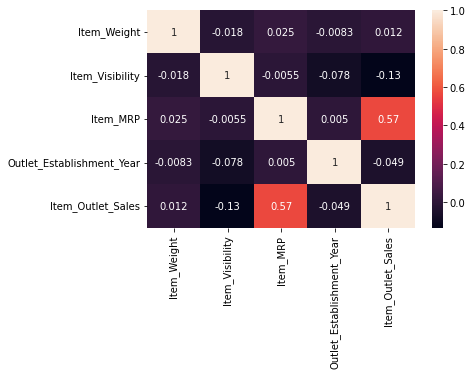

In [21]:
sns.heatmap(a.corr(), annot = True)
plt.show()

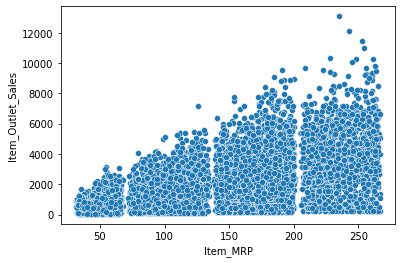

In [22]:
sns.scatterplot(x = a['Item_MRP'], y = a['Item_Outlet_Sales'], data = a)
plt.show()

**Relationship with Continuous Features.**

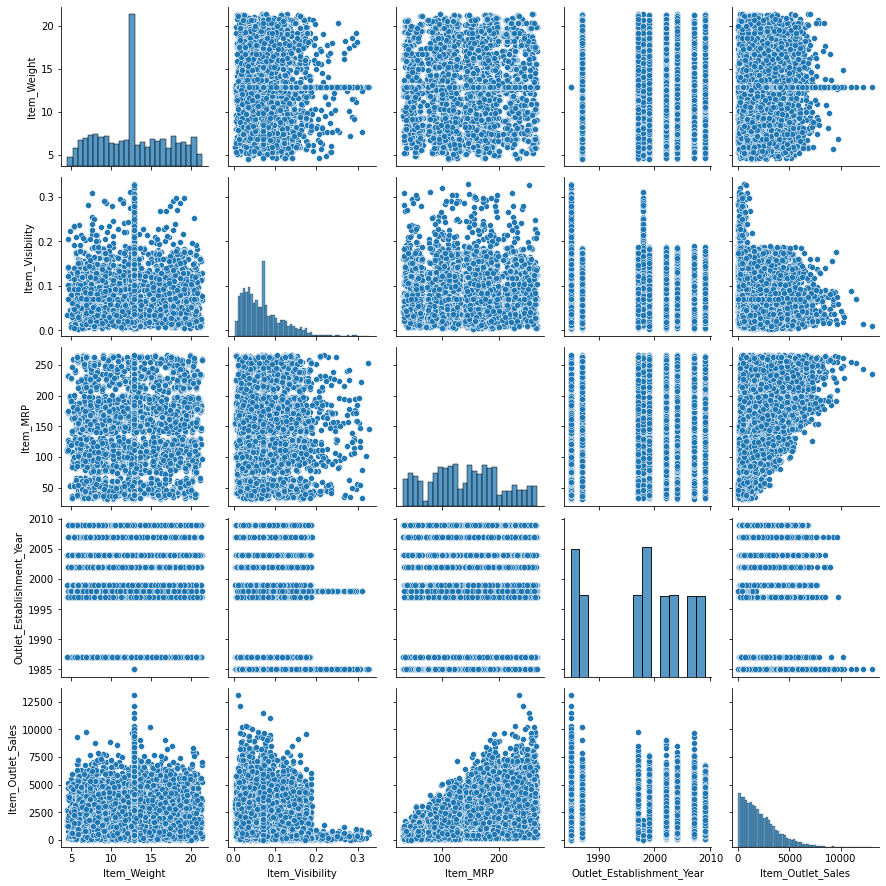

In [23]:
sns.pairplot(a)
plt.show()

In [24]:
a['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

**Relationship of target variable with Categorical Features.**

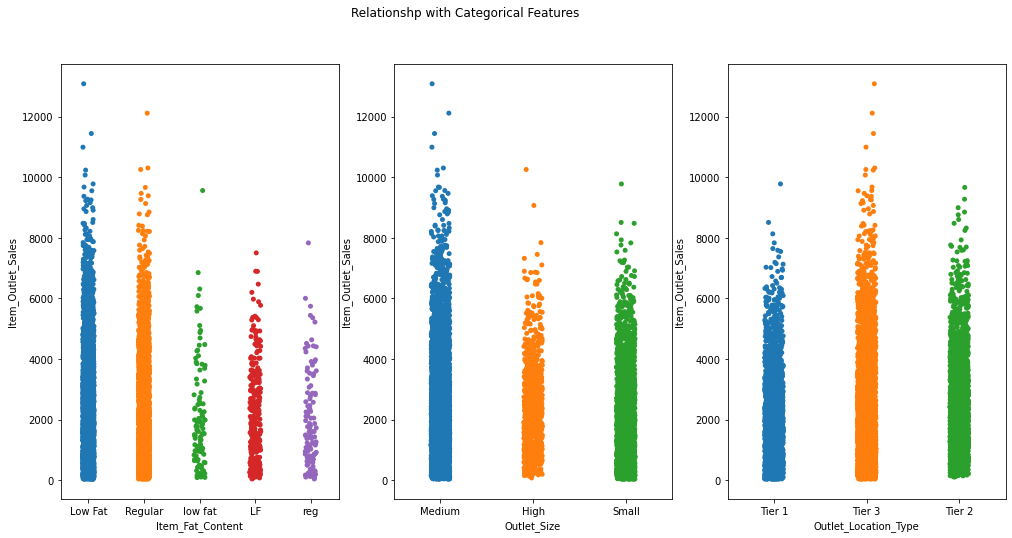

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,8))
fig.subplots_adjust(right=1)
fig.suptitle('Relationshp with Categorical Features')
for ax, feature in zip(axes.flatten(),  categorical[0:3]):
    sns.stripplot(x = feature,  y = 'Item_Outlet_Sales', data = a, ax = ax)
plt.show()

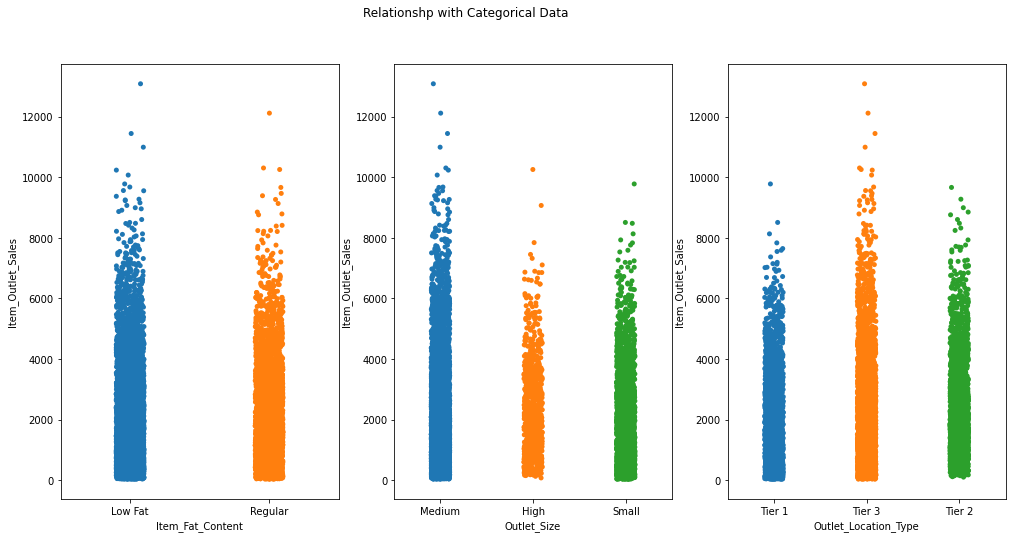

In [28]:
a.Item_Fat_Content = a.Item_Fat_Content.replace({'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular'}) 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,8))
fig.subplots_adjust(right=1)
fig.suptitle('Relationshp with Categorical Data')
for ax, feature in zip(axes.flatten(),  categorical[0:3]):
    sns.stripplot(x = feature,  y = 'Item_Outlet_Sales', data = a, ax = ax)
plt.show()

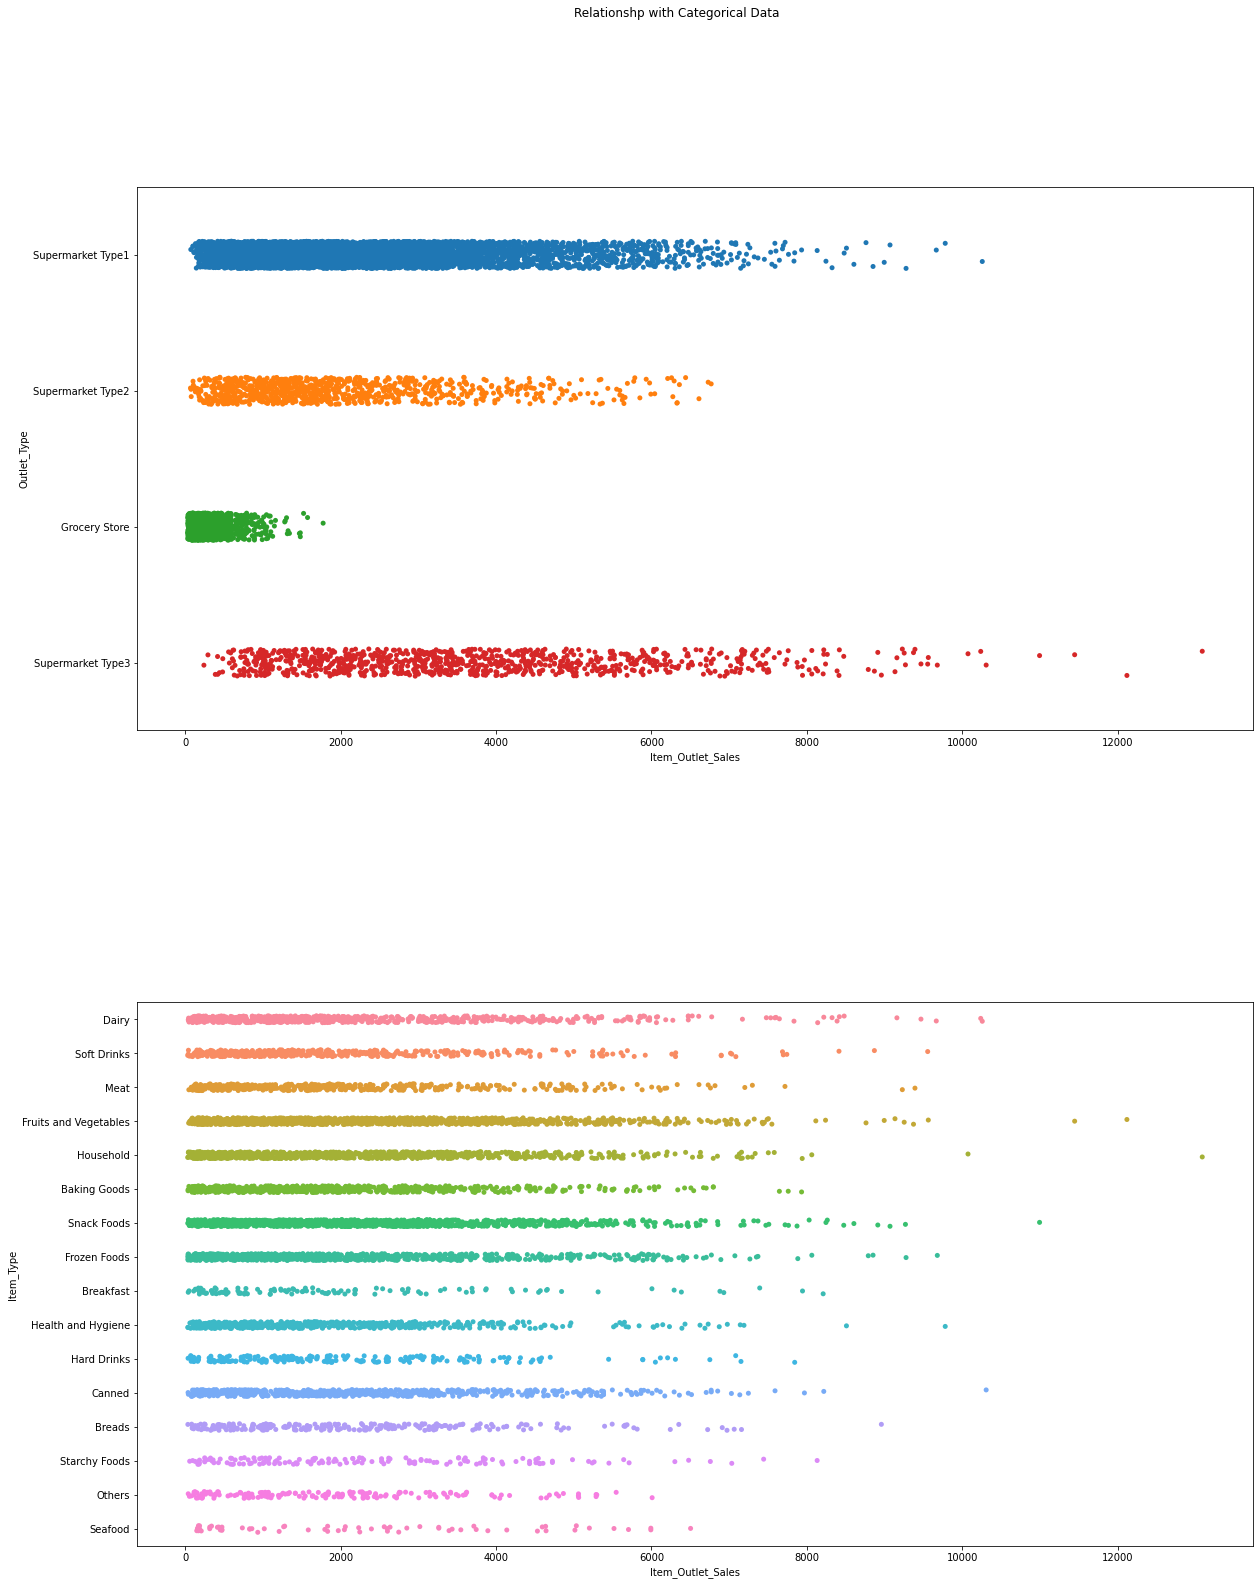

In [29]:
fig, axes = plt.subplots(nrows = 2, ncols=1, figsize = (20,25))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Relationshp with Categorical Data')
for ax, feature in zip(axes.flatten(),  categorical[3:]):
    sns.stripplot(x = 'Item_Outlet_Sales', y = feature, data = a, ax = ax)
plt.show()

<function matplotlib.pyplot.plot>

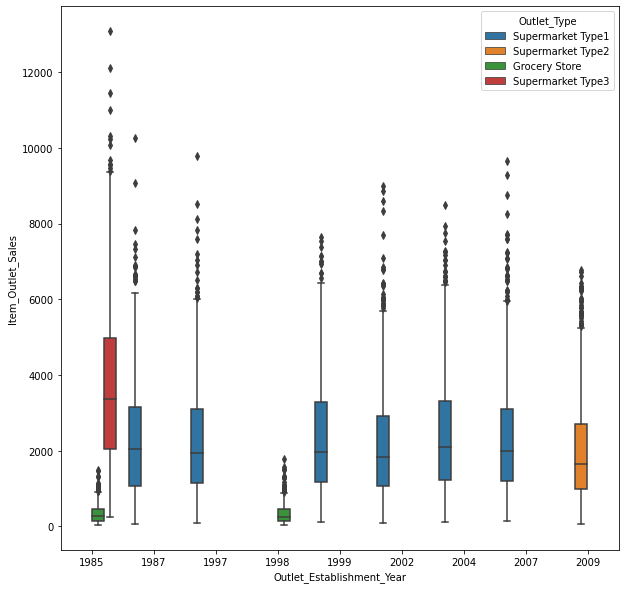

In [30]:
fig,axes = plt.subplots(figsize = (10,10))
sns.boxplot(x = a['Outlet_Establishment_Year'], y = a['Item_Outlet_Sales'], hue = a['Outlet_Type'], ax = axes )
plt.plot

In [31]:
a = pd.get_dummies(a, drop_first = True)

In [32]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Fat_Content_Regular         8523 non-null   uint8  
 6   Item_Type_Breads                 8523 non-null   uint8  
 7   Item_Type_Breakfast              8523 non-null   uint8  
 8   Item_Type_Canned                 8523 non-null   uint8  
 9   Item_Type_Dairy                  8523 non-null   uint8  
 10  Item_Type_Frozen Foods           8523 non-null   uint8  
 11  Item_Type_Fruits and Vegetables  8523 non-null   uint8  
 12  Item_Type_Hard Drink

Normality of Errors

For checking normality of errors, we will need a model and fit the data to it.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


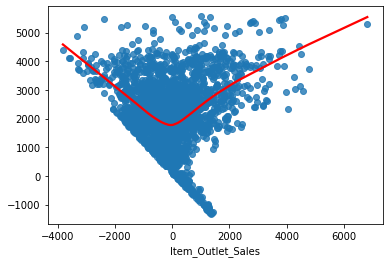

In [33]:
Y = a['Item_Outlet_Sales']
X = a.drop('Item_Outlet_Sales', axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.25)
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train, Y_train)
Y_pred = lg.predict(X_test)
residue = Y_test - Y_pred
sns.regplot(residue, Y_pred, lowess = True, line_kws={'color': 'red'})
plt.show()

In [34]:
Y_train = np.log(Y_train)
Y_test = np.log(Y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


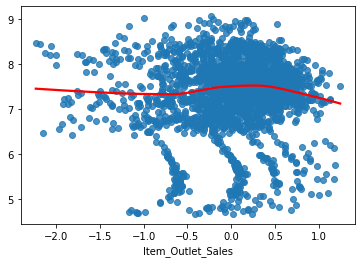

In [35]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train, Y_train)
Y_pred = lg.predict(X_test)
residue = Y_test - Y_pred
sns.regplot(residue, Y_pred, lowess = True, line_kws={'color': 'red'})
plt.show()